In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
%run 0-Function-Helper.ipynb

In [7]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")

In [8]:
print(df_merged.shape)

(40000, 10)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

In [10]:
x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_val = vectorization.transform(x_val)

# Tree-Based-Models

## RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

pred_rf = RF.predict(xv_val)
pred_rf_prob = RF.predict_proba(xv_val)

{'Accuracy': 0.84175, 'Precision': 0.8437815975733064, 'Recall': 0.8374310085298545, 'F1 Score': 0.8405943087383531, 'ROC-AUC': 0.9129501836397496}

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2007
           1       0.84      0.84      0.84      1993

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



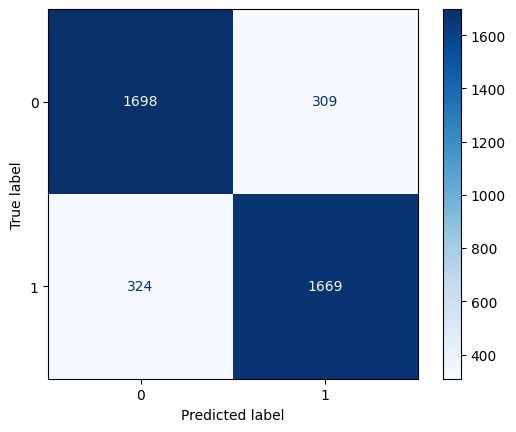

In [14]:
create_summary_for_model_metrics(y_val, pred_rf, pred_rf_prob[:,1])

## xGBoost

In [15]:
xgb_model = xgb.XGBClassifier(random_state = 0)
xgb_model.fit(xv_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [16]:
pred_xgb = xgb_model.predict(xv_val)
pred_xgb_prob = xgb_model.predict_proba(xv_val)

{'Accuracy': 0.7885, 'Precision': 0.8355763604447045, 'Recall': 0.7165077772202709, 'F1 Score': 0.7714748784440844, 'ROC-AUC': 0.8732590724236371}

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2007
           1       0.84      0.72      0.77      1993

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000



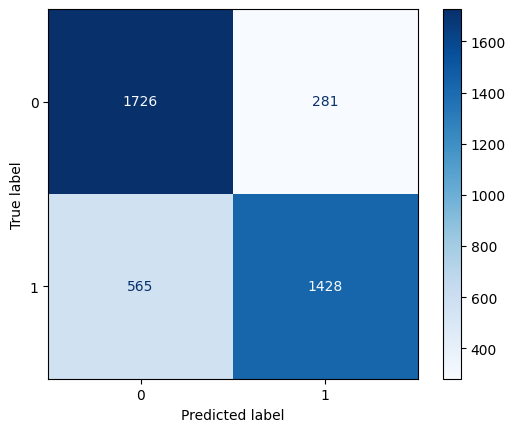

In [17]:
create_summary_for_model_metrics(y_val, pred_xgb, pred_xgb_prob[:,1])